# Practical Machine Learning
by Sven Mayer

## 	Lecture 10: Optimizer

The material is licensed under the Creative Commons Attribution-Share Alike 4.0 (CC BY-SA) license: https://creativecommons.org/licenses/by-sa/4.0

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

import sys
print("Python version: ", sys.version)
import numpy as np
print("numpy version", np.__version__)
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
print("matplotlib version", matplotlib.__version__)
import tensorflow as tf
print("TF:", tf.__version__)

physical_devices = tf.config.experimental.list_physical_devices('GPU')
if (len(physical_devices) > 0):
    tf.config.set_visible_devices(physical_devices[0], 'GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("TF: No GPU found")

import pandas as pd

from tqdm import tqdm

Python version:  3.9.1 (default, Jan  8 2021, 17:17:17) 
[Clang 12.0.0 (clang-1200.0.32.28)]
numpy version 1.19.5
matplotlib version 3.3.3
TF: 2.5.0-rc0
TF: No GPU found


In [6]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28*28)[:30000,:]
x_val = x_val.reshape(-1, 28*28)[:5000,:]
y_train = tf.keras.utils.to_categorical(y_train)[:30000,:]
y_val = tf.keras.utils.to_categorical(y_val)[:5000,:]
input_size = x_val.shape[-1]
output_size = y_val.shape[-1]
print(input_size, output_size)

784 10


# Optimizer Improvemetns

In [12]:
def getModel():
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.InputLayer((input_size,), name = "InputLayer"))

    model.add(tf.keras.layers.Dense(256, name = "HiddenLayer1", activation = 'relu')) 
    model.add(tf.keras.layers.Dropout(.5)) 

    model.add(tf.keras.layers.Dense(128, name = "HiddenLayer2", activation = 'relu')) 
    model.add(tf.keras.layers.Dropout(.5)) 

    model.add(tf.keras.layers.Dense(output_size, name = "OutputLayer", activation = 'softmax'))
    return model

model = getModel()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer1 (Dense)         (None, 256)               200960    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 128)               32896     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
OutputLayer (Dense)          (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [24]:
lst = []
lossFunction = tf.keras.losses.CategoricalCrossentropy()
for optimizer in tqdm(["adadelta", "adagrad", "adam", "adamax", "ftrl", "nadam", "rmsprop", "sgd"]):
    model = getModel()
    model.compile(optimizer=optimizer, loss=lossFunction, metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                    validation_data = (x_val, y_val),
                    epochs=25,
                       verbose=1)
    lst.append([optimizer, history])

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1/25
938/938 [==============================] - 4s 4ms/step - loss: 228.2867 - accuracy: 0.1024 - val_loss: 84.1243 - val_accuracy: 0.1046
Epoch 2/25
938/938 [==============================] - 3s 4ms/step - loss: 194.1198 - accuracy: 0.1075 - val_loss: 63.6907 - val_accuracy: 0.1238
Epoch 3/25
938/938 [==============================] - 3s 4ms/step - loss: 169.3447 - accuracy: 0.1156 - val_loss: 50.5345 - val_accuracy: 0.1536
Epoch 4/25
938/938 [==============================] - 3s 4ms/step - loss: 150.3411 - accuracy: 0.1258 - val_loss: 41.3026 - val_accuracy: 0.1828
Epoch 5/25
938/938 [==============================] - 3s 4ms/step - loss: 135.1094 - accuracy: 0.1320 - val_loss: 34.7207 - val_accuracy: 0.2128
Epoch 6/25
938/938 [==============================] - 3s 4ms/step - loss: 122.5375 - accuracy: 0.1466 - val_loss: 29.9858 - val_accuracy: 0.2544
Epoch 7/25
938/938 [==============================] - 3s 4ms/step - loss: 112.8037 - accuracy: 0.1550 - val_loss: 26.5780 - val_ac

 12%|█▎        | 1/8 [01:25<09:59, 85.63s/it]

Epoch 1/25
938/938 [==============================] - 4s 4ms/step - loss: 61.8768 - accuracy: 0.3239 - val_loss: 4.2225 - val_accuracy: 0.7290
Epoch 2/25
938/938 [==============================] - 3s 4ms/step - loss: 16.7997 - accuracy: 0.4737 - val_loss: 2.9923 - val_accuracy: 0.7468
Epoch 3/25
938/938 [==============================] - 3s 3ms/step - loss: 11.3737 - accuracy: 0.4957 - val_loss: 2.3487 - val_accuracy: 0.7562
Epoch 4/25
938/938 [==============================] - 3s 4ms/step - loss: 8.2507 - accuracy: 0.5102 - val_loss: 2.0111 - val_accuracy: 0.7550
Epoch 5/25
938/938 [==============================] - 3s 4ms/step - loss: 6.9523 - accuracy: 0.5063 - val_loss: 1.7837 - val_accuracy: 0.7474
Epoch 6/25
938/938 [==============================] - 3s 4ms/step - loss: 5.6798 - accuracy: 0.4991 - val_loss: 1.6251 - val_accuracy: 0.7484
Epoch 7/25
938/938 [==============================] - 3s 4ms/step - loss: 4.9643 - accuracy: 0.4990 - val_loss: 1.5214 - val_accuracy: 0.7404
Epo

 25%|██▌       | 2/8 [02:50<08:32, 85.47s/it]

Epoch 1/25
938/938 [==============================] - 4s 4ms/step - loss: 23.0249 - accuracy: 0.3933 - val_loss: 1.2977 - val_accuracy: 0.6142
Epoch 2/25
938/938 [==============================] - 3s 4ms/step - loss: 1.6226 - accuracy: 0.4890 - val_loss: 1.1082 - val_accuracy: 0.6544
Epoch 3/25
938/938 [==============================] - 4s 4ms/step - loss: 1.4652 - accuracy: 0.5291 - val_loss: 1.0229 - val_accuracy: 0.6978
Epoch 4/25
938/938 [==============================] - 3s 4ms/step - loss: 1.2967 - accuracy: 0.5817 - val_loss: 0.8542 - val_accuracy: 0.7634
Epoch 5/25
938/938 [==============================] - 3s 4ms/step - loss: 1.1609 - accuracy: 0.6280 - val_loss: 0.7236 - val_accuracy: 0.7848
Epoch 6/25
938/938 [==============================] - 3s 4ms/step - loss: 1.0263 - accuracy: 0.6633 - val_loss: 0.6754 - val_accuracy: 0.8510
Epoch 7/25
938/938 [==============================] - 3s 4ms/step - loss: 0.9843 - accuracy: 0.7000 - val_loss: 0.6490 - val_accuracy: 0.8564
Epoch

 38%|███▊      | 3/8 [04:17<07:08, 85.73s/it]

Epoch 1/25
938/938 [==============================] - 4s 4ms/step - loss: 37.0946 - accuracy: 0.3188 - val_loss: 1.7230 - val_accuracy: 0.4492
Epoch 2/25
938/938 [==============================] - 4s 4ms/step - loss: 2.5116 - accuracy: 0.2891 - val_loss: 1.5263 - val_accuracy: 0.5176
Epoch 3/25
938/938 [==============================] - 4s 4ms/step - loss: 1.9192 - accuracy: 0.3842 - val_loss: 1.4158 - val_accuracy: 0.5554
Epoch 4/25
938/938 [==============================] - 4s 4ms/step - loss: 1.7142 - accuracy: 0.4413 - val_loss: 1.2575 - val_accuracy: 0.6292
Epoch 5/25
938/938 [==============================] - 4s 4ms/step - loss: 1.5700 - accuracy: 0.4859 - val_loss: 1.1423 - val_accuracy: 0.6608
Epoch 6/25
938/938 [==============================] - 3s 4ms/step - loss: 1.4646 - accuracy: 0.5211 - val_loss: 1.0575 - val_accuracy: 0.6960
Epoch 7/25
938/938 [==============================] - 4s 4ms/step - loss: 1.3430 - accuracy: 0.5621 - val_loss: 1.0192 - val_accuracy: 0.7178
Epoch

 50%|█████     | 4/8 [05:44<05:45, 86.48s/it]

Epoch 1/25
938/938 [==============================] - 4s 4ms/step - loss: 25.7898 - accuracy: 0.3212 - val_loss: 1.3089 - val_accuracy: 0.5770
Epoch 2/25
938/938 [==============================] - 3s 4ms/step - loss: 2.8397 - accuracy: 0.3841 - val_loss: 1.4453 - val_accuracy: 0.5892
Epoch 3/25
938/938 [==============================] - 4s 4ms/step - loss: 2.0668 - accuracy: 0.4088 - val_loss: 1.3539 - val_accuracy: 0.6456
Epoch 4/25
938/938 [==============================] - 3s 4ms/step - loss: 1.8442 - accuracy: 0.4385 - val_loss: 1.2275 - val_accuracy: 0.6728
Epoch 5/25
938/938 [==============================] - 3s 4ms/step - loss: 1.6870 - accuracy: 0.4674 - val_loss: 1.1356 - val_accuracy: 0.7090
Epoch 6/25
938/938 [==============================] - 3s 4ms/step - loss: 1.6167 - accuracy: 0.4849 - val_loss: 1.0585 - val_accuracy: 0.7384
Epoch 7/25
938/938 [==============================] - 4s 4ms/step - loss: 1.5243 - accuracy: 0.5096 - val_loss: 0.9989 - val_accuracy: 0.7596
Epoch

 62%|██████▎   | 5/8 [07:14<04:23, 87.71s/it]

Epoch 1/25
938/938 [==============================] - 5s 5ms/step - loss: 23.5468 - accuracy: 0.4076 - val_loss: 1.2913 - val_accuracy: 0.6186
Epoch 2/25
938/938 [==============================] - 5s 5ms/step - loss: 1.6460 - accuracy: 0.4888 - val_loss: 1.0276 - val_accuracy: 0.7124
Epoch 3/25
938/938 [==============================] - 5s 5ms/step - loss: 1.3798 - accuracy: 0.5846 - val_loss: 0.9543 - val_accuracy: 0.7982
Epoch 4/25
938/938 [==============================] - 4s 5ms/step - loss: 1.2470 - accuracy: 0.6450 - val_loss: 0.7653 - val_accuracy: 0.8320
Epoch 5/25
938/938 [==============================] - 4s 5ms/step - loss: 1.0078 - accuracy: 0.7043 - val_loss: 0.6234 - val_accuracy: 0.8710
Epoch 6/25
938/938 [==============================] - 4s 5ms/step - loss: 0.9099 - accuracy: 0.7419 - val_loss: 0.5781 - val_accuracy: 0.8668
Epoch 7/25
938/938 [==============================] - 4s 5ms/step - loss: 0.8280 - accuracy: 0.7588 - val_loss: 0.5524 - val_accuracy: 0.8638
Epoch

 75%|███████▌  | 6/8 [09:07<03:12, 96.46s/it]

Epoch 1/25
938/938 [==============================] - 5s 4ms/step - loss: 21.8982 - accuracy: 0.4233 - val_loss: 1.1722 - val_accuracy: 0.7324
Epoch 2/25
938/938 [==============================] - 4s 4ms/step - loss: 1.5385 - accuracy: 0.6577 - val_loss: 0.9902 - val_accuracy: 0.8450
Epoch 3/25
938/938 [==============================] - 4s 4ms/step - loss: 1.2129 - accuracy: 0.7531 - val_loss: 0.8162 - val_accuracy: 0.8680
Epoch 4/25
938/938 [==============================] - 4s 4ms/step - loss: 1.0152 - accuracy: 0.8022 - val_loss: 0.6704 - val_accuracy: 0.8784
Epoch 5/25
938/938 [==============================] - 4s 4ms/step - loss: 0.9106 - accuracy: 0.8254 - val_loss: 0.5631 - val_accuracy: 0.8974
Epoch 6/25
938/938 [==============================] - 4s 4ms/step - loss: 0.8769 - accuracy: 0.8446 - val_loss: 0.5368 - val_accuracy: 0.9026
Epoch 7/25
938/938 [==============================] - 4s 4ms/step - loss: 0.7959 - accuracy: 0.8527 - val_loss: 0.5552 - val_accuracy: 0.9062
Epoch

 88%|████████▊ | 7/8 [10:47<01:37, 97.48s/it]

Epoch 1/25
938/938 [==============================] - 4s 4ms/step - loss: nan - accuracy: 0.0976 - val_loss: nan - val_accuracy: 0.0920
Epoch 2/25
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0984 - val_loss: nan - val_accuracy: 0.0920
Epoch 3/25
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0968 - val_loss: nan - val_accuracy: 0.0920
Epoch 4/25
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0999 - val_loss: nan - val_accuracy: 0.0920
Epoch 5/25
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0978 - val_loss: nan - val_accuracy: 0.0920
Epoch 6/25
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0994 - val_loss: nan - val_accuracy: 0.0920
Epoch 7/25
938/938 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0979 - val_loss: nan - val_accuracy: 0.0920
Epoch 8/25
938/938 [============================

100%|██████████| 8/8 [12:10<00:00, 91.27s/it]


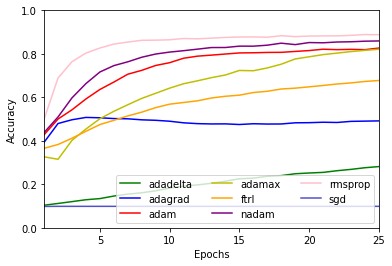

In [63]:
fig, ax = plt.subplots()
epochs = len(history.history['accuracy'])
c = ["g", "b", "r", "y", "orange", "purple", "pink", "#5050cc", "#1ddeb1", "#5ce30e"]
for i, (name, history) in enumerate(lst):
    plt.plot(list(range(1,epochs+1,1)),history.history['accuracy'], label=f"{name}", c=c[i])
#for i, (name, history) in enumerate(lst):
#    plt.plot(history.history['val_accuracy'], label=f"{name} - V", ls="--", c=c[i])
plt.ylim(0,1)
plt.xlim(1, len(history.history['accuracy']))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(ncol=3, loc=4)
plt.savefig("./figures/10_Optimizer.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

# Learning Rate

In [42]:
lr_range = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
lst_lr = []
for learning_rate in tqdm(lr_range):
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model = getModel()
    model.compile(optimizer=optimizer, loss=lossFunction, metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                    validation_data = (x_val, y_val),
                    epochs=25,
                       verbose=1)
    lst_lr.append([learning_rate, history])

  0%|          | 0/9 [00:00<?, ?it/s]

Epoch 1/25
938/938 [==============================] - 4s 4ms/step - loss: 243.9518 - accuracy: 0.0945 - val_loss: 91.1107 - val_accuracy: 0.0820
Epoch 2/25
938/938 [==============================] - 3s 3ms/step - loss: 208.4988 - accuracy: 0.1017 - val_loss: 67.6521 - val_accuracy: 0.0980
Epoch 3/25
938/938 [==============================] - 3s 3ms/step - loss: 186.1036 - accuracy: 0.1062 - val_loss: 52.7131 - val_accuracy: 0.1220
Epoch 4/25
938/938 [==============================] - 3s 3ms/step - loss: 165.3556 - accuracy: 0.1208 - val_loss: 43.0138 - val_accuracy: 0.1652
Epoch 5/25
938/938 [==============================] - 3s 3ms/step - loss: 148.5613 - accuracy: 0.1309 - val_loss: 36.0763 - val_accuracy: 0.2130
Epoch 6/25
938/938 [==============================] - 3s 3ms/step - loss: 135.7601 - accuracy: 0.1403 - val_loss: 30.9300 - val_accuracy: 0.2602
Epoch 7/25
938/938 [==============================] - 3s 4ms/step - loss: 121.9539 - accuracy: 0.1513 - val_loss: 27.0454 - val_ac

 11%|█         | 1/9 [01:23<11:05, 83.15s/it]

Epoch 1/25
938/938 [==============================] - 4s 4ms/step - loss: 175.3493 - accuracy: 0.1376 - val_loss: 19.4197 - val_accuracy: 0.4708
Epoch 2/25
938/938 [==============================] - 3s 4ms/step - loss: 77.1935 - accuracy: 0.2342 - val_loss: 10.8960 - val_accuracy: 0.5850
Epoch 3/25
938/938 [==============================] - 3s 4ms/step - loss: 48.3444 - accuracy: 0.3086 - val_loss: 7.6217 - val_accuracy: 0.6508
Epoch 4/25
938/938 [==============================] - 3s 4ms/step - loss: 33.8272 - accuracy: 0.3590 - val_loss: 5.8310 - val_accuracy: 0.6828
Epoch 5/25
938/938 [==============================] - 4s 4ms/step - loss: 25.3931 - accuracy: 0.4005 - val_loss: 4.6031 - val_accuracy: 0.7112
Epoch 6/25
938/938 [==============================] - 4s 4ms/step - loss: 19.6583 - accuracy: 0.4275 - val_loss: 3.7793 - val_accuracy: 0.7260
Epoch 7/25
938/938 [==============================] - 3s 4ms/step - loss: 15.5532 - accuracy: 0.4505 - val_loss: 3.1282 - val_accuracy: 0.7

 22%|██▏       | 2/9 [02:49<09:53, 84.80s/it]

Epoch 1/25
938/938 [==============================] - 4s 4ms/step - loss: 87.2708 - accuracy: 0.2579 - val_loss: 3.0514 - val_accuracy: 0.7216
Epoch 2/25
938/938 [==============================] - 3s 4ms/step - loss: 9.4218 - accuracy: 0.4716 - val_loss: 1.6113 - val_accuracy: 0.6724
Epoch 3/25
938/938 [==============================] - 3s 4ms/step - loss: 3.4868 - accuracy: 0.4437 - val_loss: 1.4141 - val_accuracy: 0.6220
Epoch 4/25
938/938 [==============================] - 3s 4ms/step - loss: 2.2285 - accuracy: 0.4464 - val_loss: 1.3617 - val_accuracy: 0.6208
Epoch 5/25
938/938 [==============================] - 4s 4ms/step - loss: 1.8644 - accuracy: 0.4686 - val_loss: 1.2956 - val_accuracy: 0.6240
Epoch 6/25
938/938 [==============================] - 3s 4ms/step - loss: 1.6343 - accuracy: 0.5090 - val_loss: 1.2081 - val_accuracy: 0.6604
Epoch 7/25
938/938 [==============================] - 4s 4ms/step - loss: 1.5132 - accuracy: 0.5528 - val_loss: 1.0863 - val_accuracy: 0.7002
Epoch

 33%|███▎      | 3/9 [04:15<08:33, 85.54s/it]

Epoch 1/25
938/938 [==============================] - 4s 4ms/step - loss: 22.3174 - accuracy: 0.4027 - val_loss: 1.2778 - val_accuracy: 0.6102
Epoch 2/25
938/938 [==============================] - 3s 4ms/step - loss: 1.6408 - accuracy: 0.4873 - val_loss: 1.0991 - val_accuracy: 0.6738
Epoch 3/25
938/938 [==============================] - 3s 4ms/step - loss: 1.4861 - accuracy: 0.5354 - val_loss: 0.9836 - val_accuracy: 0.7650
Epoch 4/25
938/938 [==============================] - 3s 3ms/step - loss: 1.2966 - accuracy: 0.6060 - val_loss: 0.8332 - val_accuracy: 0.7990
Epoch 5/25
938/938 [==============================] - 3s 3ms/step - loss: 1.1221 - accuracy: 0.6708 - val_loss: 0.6324 - val_accuracy: 0.8444
Epoch 6/25
938/938 [==============================] - 3s 4ms/step - loss: 0.9424 - accuracy: 0.7195 - val_loss: 0.6106 - val_accuracy: 0.8652
Epoch 7/25
938/938 [==============================] - 3s 4ms/step - loss: 0.8767 - accuracy: 0.7410 - val_loss: 0.5581 - val_accuracy: 0.8724
Epoch

 44%|████▍     | 4/9 [05:41<07:07, 85.60s/it]

Epoch 1/25
938/938 [==============================] - 4s 4ms/step - loss: 20.4557 - accuracy: 0.1696 - val_loss: 2.3036 - val_accuracy: 0.1142
Epoch 2/25
938/938 [==============================] - 3s 4ms/step - loss: 2.3253 - accuracy: 0.1159 - val_loss: 2.3023 - val_accuracy: 0.1142
Epoch 3/25
938/938 [==============================] - 3s 4ms/step - loss: 2.3207 - accuracy: 0.1108 - val_loss: 2.3019 - val_accuracy: 0.1142
Epoch 4/25
938/938 [==============================] - 3s 4ms/step - loss: 2.3061 - accuracy: 0.1136 - val_loss: 2.3024 - val_accuracy: 0.1142
Epoch 5/25
938/938 [==============================] - 3s 4ms/step - loss: 2.3298 - accuracy: 0.1122 - val_loss: 2.3024 - val_accuracy: 0.1142
Epoch 6/25
938/938 [==============================] - 3s 4ms/step - loss: 2.4232 - accuracy: 0.1146 - val_loss: 2.3011 - val_accuracy: 0.1142
Epoch 7/25
938/938 [==============================] - 3s 4ms/step - loss: 2.3066 - accuracy: 0.1094 - val_loss: 2.3018 - val_accuracy: 0.1142
Epoch

 56%|█████▌    | 5/9 [07:05<05:39, 84.96s/it]

Epoch 1/25
938/938 [==============================] - 4s 4ms/step - loss: 318.4800 - accuracy: 0.1051 - val_loss: 2.3229 - val_accuracy: 0.0920
Epoch 2/25
938/938 [==============================] - 3s 3ms/step - loss: 3.8281 - accuracy: 0.1028 - val_loss: 2.3070 - val_accuracy: 0.1142
Epoch 3/25
938/938 [==============================] - 3s 4ms/step - loss: 2.4062 - accuracy: 0.0993 - val_loss: 2.3154 - val_accuracy: 0.1142
Epoch 4/25
938/938 [==============================] - 3s 4ms/step - loss: 8.6324 - accuracy: 0.1045 - val_loss: 2.3085 - val_accuracy: 0.1142
Epoch 5/25
938/938 [==============================] - 3s 4ms/step - loss: 2.3142 - accuracy: 0.1045 - val_loss: 2.3107 - val_accuracy: 0.0978
Epoch 6/25
938/938 [==============================] - 3s 4ms/step - loss: 2.3143 - accuracy: 0.1037 - val_loss: 2.3144 - val_accuracy: 0.0924
Epoch 7/25
938/938 [==============================] - 3s 4ms/step - loss: 3.4071 - accuracy: 0.0988 - val_loss: 2.3131 - val_accuracy: 0.1060
Epoc

 67%|██████▋   | 6/9 [08:30<04:15, 85.22s/it]

Epoch 1/25
938/938 [==============================] - 4s 4ms/step - loss: 220630.6226 - accuracy: 0.1054 - val_loss: 2.4432 - val_accuracy: 0.1000
Epoch 2/25
938/938 [==============================] - 3s 4ms/step - loss: 27.5078 - accuracy: 0.1054 - val_loss: 2.4129 - val_accuracy: 0.1000
Epoch 3/25
938/938 [==============================] - 3s 4ms/step - loss: 2.5075 - accuracy: 0.1026 - val_loss: 2.3585 - val_accuracy: 0.1142
Epoch 4/25
938/938 [==============================] - 3s 4ms/step - loss: 2.4049 - accuracy: 0.0987 - val_loss: 2.4332 - val_accuracy: 0.0920
Epoch 5/25
938/938 [==============================] - 3s 4ms/step - loss: 2.4272 - accuracy: 0.1016 - val_loss: 2.3557 - val_accuracy: 0.1000
Epoch 6/25
938/938 [==============================] - 3s 4ms/step - loss: 2.4096 - accuracy: 0.0998 - val_loss: 2.4461 - val_accuracy: 0.0920
Epoch 7/25
938/938 [==============================] - 3s 4ms/step - loss: 133.4094 - accuracy: 0.1015 - val_loss: 2.4055 - val_accuracy: 0.100

 78%|███████▊  | 7/9 [09:56<02:50, 85.34s/it]

Epoch 1/25
938/938 [==============================] - 4s 4ms/step - loss: 169561410.3505 - accuracy: 0.1055 - val_loss: 2.6576 - val_accuracy: 0.1000
Epoch 2/25
938/938 [==============================] - 3s 4ms/step - loss: 307429.9418 - accuracy: 0.1017 - val_loss: 2.9726 - val_accuracy: 0.1024
Epoch 3/25
938/938 [==============================] - 3s 4ms/step - loss: 1245984.7608 - accuracy: 0.0990 - val_loss: 2.6934 - val_accuracy: 0.0920
Epoch 4/25
938/938 [==============================] - 3s 4ms/step - loss: 297662.7992 - accuracy: 0.1015 - val_loss: 3.4101 - val_accuracy: 0.0920
Epoch 5/25
938/938 [==============================] - 3s 4ms/step - loss: 52937.8988 - accuracy: 0.0964 - val_loss: 3.1202 - val_accuracy: 0.0924
Epoch 6/25
938/938 [==============================] - 3s 4ms/step - loss: 3.2518 - accuracy: 0.0996 - val_loss: 3.3321 - val_accuracy: 0.1000
Epoch 7/25
938/938 [==============================] - 3s 4ms/step - loss: 3.1897 - accuracy: 0.1002 - val_loss: 2.8414 -

 89%|████████▉ | 8/9 [11:23<01:25, 85.81s/it]

Epoch 1/25
938/938 [==============================] - 4s 4ms/step - loss: 109473295695.0886 - accuracy: 0.0990 - val_loss: 63.9248 - val_accuracy: 0.1000
Epoch 2/25
938/938 [==============================] - 3s 4ms/step - loss: 12104263962.0516 - accuracy: 0.1013 - val_loss: 55.7606 - val_accuracy: 0.0978
Epoch 3/25
938/938 [==============================] - 4s 4ms/step - loss: 762114952.5882 - accuracy: 0.0973 - val_loss: 54.4289 - val_accuracy: 0.1024
Epoch 4/25
938/938 [==============================] - 4s 4ms/step - loss: 603783672.0930 - accuracy: 0.0986 - val_loss: 30.8899 - val_accuracy: 0.1000
Epoch 5/25
938/938 [==============================] - 3s 4ms/step - loss: 161995417.6610 - accuracy: 0.0992 - val_loss: 58.8267 - val_accuracy: 0.1000
Epoch 6/25
938/938 [==============================] - 3s 4ms/step - loss: 142571550.5316 - accuracy: 0.1052 - val_loss: 44.6114 - val_accuracy: 0.1142
Epoch 7/25
938/938 [==============================] - 4s 4ms/step - loss: 56.2275 - accur

100%|██████████| 9/9 [12:50<00:00, 85.64s/it]


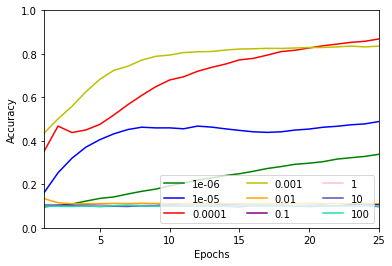

In [65]:
fig, ax = plt.subplots()
epochs = len(history.history['accuracy'])
c = ["g", "b", "r", "y", "orange", "purple", "pink", "#5050cc", "#1ddeb1", "#5ce30e"]
for i, (name, history) in enumerate(lst_lr):
    plt.plot(list(range(1,epochs+1,1)),history.history['accuracy'], label=f"{name}", c=c[i])
#for i, (name, history) in enumerate(lst):
#    plt.plot(history.history['val_accuracy'], label=f"{name} - V", ls="--", c=c[i])
plt.ylim(0,1)
plt.xlim(1, len(history.history['accuracy']))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(ncol=3, loc=4)
plt.savefig("./figures/10_learning_rate.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

# Loss

<ipython-input-603-2c901e2c12aa>:6: RuntimeWarning: invalid value encountered in log
  plt.plot(y_pred, np.square(np.log(y_true+1)-np.log(y_pred+1)), label="Squared Log")


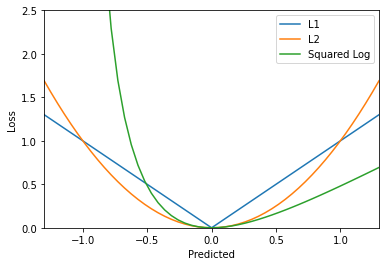

In [603]:
import sklearn.metrics
y_pred = np.linspace(-1.3,1.3,51)
y_true = np.array([0] * len(y_pred))

plt.plot(y_pred, np.abs(y_true- y_pred), label="L1")
plt.plot(y_pred, np.square(y_true-y_pred), label="L2")
plt.plot(y_pred, np.square(np.log(y_true+1)-np.log(y_pred+1)), label="Squared Log")
plt.ylim(0,2.5)
plt.xlim(np.min(y_pred),np.max(y_pred))
plt.xlabel('Predicted')
plt.ylabel('Loss')
plt.legend()
plt.savefig("./figures/10_loss_reg.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

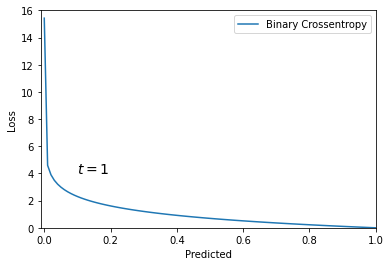

In [601]:
logits = np.linspace(0,1,100)
y_pred = np.zeros((len(logits), 2))
y_pred[:,0] = 1-logits
y_pred[:,1] = logits
#y_pred = scipy.special.softmax(y_pred)

labels = np.zeros((len(logits), 2))
labels[:,1] = 1
bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
y = []
for i in range(len(labels)):
    y.append(bce([labels[i]], [y_pred[i]]).numpy())
plt.plot(logits, y, label="Binary Crossentropy")

plt.xlabel('Predicted')
plt.ylabel('Loss')
plt.xlim(-.01, 1)

plt.ylim(0, 16)
plt.text (0.1,4, "$t=1$", size=14)
plt.legend()

plt.savefig("./figures/10_loss_class.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

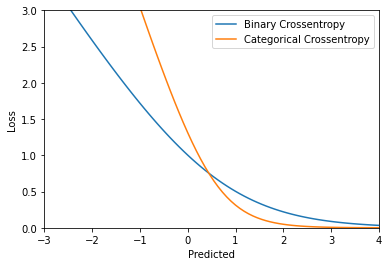

In [595]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

logits = np.linspace(-4,5,100)
y_pred = np.zeros((len(logits), 2))
y_pred[:,0] = 1-logits
y_pred[:,1] = logits

labels = np.zeros((len(logits), 2))
labels[:,1] = 1
bce = tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)
cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)
plt.plot(logits, bce(labels, y_pred).numpy(), label="Binary Crossentropy")
plt.plot(logits, cce(labels, y_pred).numpy(), label="Categorical Crossentropy")

plt.xlabel('Predicted')
plt.ylabel('Loss')
plt.xlim(-3, 4)

plt.ylim(0, 3)
plt.legend()
plt.show()